# Steps to build a Neural Network in NumPy

<ol>1. Loading the dataset (Input and Output)</ol>
<ol>2. Architecture of the model (# input, hidden and output neurons)</ol>
<ol>3. Initializing the weights for all the layers</ol>
<ol>4. Implementing forward propagation</ol>
<ol>5. Implementing backward propagation</ol>
<ol>6. Train the model for n epochs </ol>

## 1. Loading the dataset (Input and Output)

In [1]:
# importing required libraries
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# creating the input array
X=np.array([[1,0,1,0], [1,0,1,1], [0,1,0,1]])
print ('\n Input:')
print(X)
# shape of input array
print('\n Shape of Input:', X.shape)


 Input:
[[1 0 1 0]
 [1 0 1 1]
 [0 1 0 1]]

 Shape of Input: (3, 4)


In [3]:
# converting the input in matrix form
X = X.T
print('\n Input in matrix form:')
print(X)
# shape of input matrix
print('\n Shape of Input Matrix:', X.shape)


 Input in matrix form:
[[1 1 0]
 [0 0 1]
 [1 1 0]
 [0 1 1]]

 Shape of Input Matrix: (4, 3)


In [4]:
# creating the output array
y=np.array([[1],[1],[0]])
print ('\n Actual Output:')
print(y)

# output in matrix form
y = y.T

print ('\n Output in matrix form:')
print(y)

# shape of input array
print('\n Shape of Output:', y.shape)


 Actual Output:
[[1]
 [1]
 [0]]

 Output in matrix form:
[[1 1 0]]

 Shape of Output: (1, 3)


## 2. Architecture of the model (# input, hidden and output neurons)

In [5]:
inputlayer_neurons = X.shape[0] # number of features in data set
hiddenlayer_neurons = 3 # number of hidden layers neurons
output_neurons = 1 # number of neurons at output layer

![](model_architecture.png)

## 3. Initializing the weights for all the layers

NOTE: For simplicity, the bias for all the layers is 0

In [6]:
# initializing weight
# Shape of w_ih should number of neurons at input layer X number of neurons at hidden layer
w_ih=np.random.uniform(size=(inputlayer_neurons,hiddenlayer_neurons))


# Shape of w_ho should number of neurons at hidden layer X number of neurons at output layer
w_ho=np.random.uniform(size=(hiddenlayer_neurons,output_neurons))

In [7]:
# shape of weight matrix
w_ih.shape, w_ho.shape

((4, 3), (3, 1))

## 4. Implementing forward propagation

![](hidden_layer_activations.png)

In [9]:
# defining the Sigmoid Function
def sigmoid (x):
    return 1/(1 + np.exp(-x))

In [10]:
# hidden layer activations
hidden_layer_input=np.dot(w_ih.T,X)
hiddenlayer_activations = sigmoid(hidden_layer_input)

![](output.png)

In [11]:
# calculating the output
output_layer_input=np.dot(w_ho.T,hiddenlayer_activations)
output = sigmoid(output_layer_input)

In [12]:
# output
output

array([[0.81341607, 0.82886043, 0.79915787]])

## 5. Implementing backward propagation

![](error.png)

In [13]:
# calculating error
error = np.square(y-output)/2

### Rate of change of error w.r.t weight between hidden and output layer

![](error_wrt_who.png)

**a. Rate of change of error w.r.t output**

**b. Rate of change of output w.r.t Z2**

**c. Rate of change of Z2 w.r.t weights between hidden and output layer**

In [14]:
# rate of change of error w.r.t. output
error_wrt_output = -(y-output)

In [15]:
# rate of change of output w.r.t. Z2
output_wrt_Z2 = np.multiply(output,(1-output))

In [16]:
# rate of change of Z2 w.r.t. weights between hidden and output layer
Z2_wrt_who = hiddenlayer_activations

In [17]:
# checking the shapes of partial derivatives
error_wrt_output.shape, output_wrt_Z2.shape, Z2_wrt_who.shape

((1, 3), (1, 3), (3, 3))

In [18]:
# shape of weights of output layer
w_ho.shape

(3, 1)

![](error_wrt_who_matrix.png)

In [19]:
# rate of change of error w.r.t weight between hidden and output layer
error_wrt_who = np.dot(Z2_wrt_who,(error_wrt_output*output_wrt_Z2).T)

In [20]:
error_wrt_who.shape

(3, 1)

### Rate of change of error w.r.t weight between input and hidden layer

![](error_wrt_wih.png)

**a. Rate of change of error w.r.t output**

**b. Rate of change of output w.r.t Z2**

**c. Rate of change of Z2 w.r.t hidden layer activations**

**d. Rate of change of hidden layer activations w.r.t Z1**

**e. Rate of change of Z1 w.r.t weights between input and hidden layer**

In [21]:
# rate of change of error w.r.t. output
error_wrt_output = -(y-output)

In [22]:
# rate of change of output w.r.t. Z2
output_wrt_Z2 = np.multiply(output,(1-output))

In [23]:
# rate of change of Z2 w.r.t. hidden layer activations
Z2_wrt_h1 = w_ho

In [24]:
# rate of change of hidden layer activations w.r.t. Z1
h1_wrt_Z1 = np.multiply(hiddenlayer_activations,(1-hiddenlayer_activations))

In [25]:
# rate of change of Z1 w.r.t. weights between input and hidden layer
Z1_wrt_wih = X

In [26]:
# checking the shapes of partial derivatives
error_wrt_output.shape, output_wrt_Z2.shape, Z2_wrt_h1.shape, h1_wrt_Z1.shape, Z1_wrt_wih.shape

((1, 3), (1, 3), (3, 1), (3, 3), (4, 3))

In [27]:
# shape of weights of hidden layer
w_ih.shape

(4, 3)

![](error_wrt_wih_matrix.png)

In [28]:
# rate of change of error w.r.t weights between input and hidden layer
error_wrt_wih = np.dot(Z1_wrt_wih,(h1_wrt_Z1*np.dot(Z2_wrt_h1,(output_wrt_Z2*error_wrt_output))).T)

In [29]:
error_wrt_wih.shape

(4, 3)

### Update the parameters

![](gradient_descent_update_equation.png)

In [30]:
# defining the learning rate
lr = 0.01

In [31]:
# initial w_ho and w_ih
w_ho

array([[0.44822783],
       [0.73654952],
       [0.83184185]])

In [32]:
w_ih

array([[0.7728004 , 0.81257731, 0.68099322],
       [0.472226  , 0.9905042 , 0.08941713],
       [0.38391006, 0.38006455, 0.07629581],
       [0.49272597, 0.04084443, 0.38873023]])

In [33]:
# updating the weights of output layer
w_ho = w_ho - lr * error_wrt_who

In [34]:
# updating the weights of hidden layer
w_ih = w_ih - lr * error_wrt_wih

In [35]:
# updated w_ho and w_ih
w_ho

array([[0.44771808],
       [0.73600921],
       [0.83142701]])

In [36]:
w_ih

array([[0.77283822, 0.8126458 , 0.68108137],
       [0.47211114, 0.99032116, 0.08916506],
       [0.38394787, 0.38013304, 0.07638396],
       [0.49262583, 0.04069262, 0.38851513]])

## 6. Training the model for n epochs

In [37]:
# defining the model architecture
inputlayer_neurons = X.shape[0] # number of features in data set
hiddenlayer_neurons = 3 # number of hidden layers neurons
output_neurons = 1 # number of neurons at output layer

# initializing weight
w_ih=np.random.uniform(size=(inputlayer_neurons,hiddenlayer_neurons))
w_ho=np.random.uniform(size=(hiddenlayer_neurons,output_neurons))

# defining the parameters
lr = 0.01
epochs = 10000

In [38]:
# initial w_ih and w_ho
w_ih

array([[0.43376428, 0.79617611, 0.69484025],
       [0.28624531, 0.36231275, 0.57355385],
       [0.75107287, 0.5764279 , 0.3250548 ],
       [0.64492206, 0.43251823, 0.63754805]])

In [39]:
w_ho

array([[0.8387359 ],
       [0.46138792],
       [0.21555906]])

In [40]:
error_epoch = []
for i in range(epochs):
    
    # Forward Propogation
    
    # hidden layer activations
    hidden_layer_input=np.dot(w_ih.T,X)
    hiddenlayer_activations = sigmoid(hidden_layer_input)
    
    # calculating the output
    output_layer_input=np.dot(w_ho.T,hiddenlayer_activations)
    output = sigmoid(output_layer_input)
    
    
    # Backward Propagation
    
    # calculating error
    error = np.square(y-output)/2 # go to the next step for theory
    error_wrt_output = -(y-output)
    output_wrt_Z2 = np.multiply(output,(1-output))
    Z2_wrt_who = hiddenlayer_activations
    
    # rate of change of error w.r.t weight between hidden and output layer
    error_wrt_who = np.dot(Z2_wrt_who,(error_wrt_output*output_wrt_Z2).T)
    Z2_wrt_h1 = w_ho
    h1_wrt_Z1 = np.multiply(hiddenlayer_activations,(1-hiddenlayer_activations))
    Z1_wrt_wih = X
    
    # rate of change of error w.r.t weights between input and hidden layer
    error_wrt_wih = np.dot(Z1_wrt_wih,(h1_wrt_Z1*np.dot(Z2_wrt_h1,(error_wrt_output*output_wrt_Z2))).T)

    # updating the weights between hidden and output layer
    w_ho = w_ho - lr * error_wrt_who
    # updating the weights between input and hidden layer
    w_ih = w_ih - lr * error_wrt_wih
    
    # appending the error of each epoch
    error_epoch.append(np.average(error))

In [41]:
# updated w_ih and w_ho
w_ih

array([[ 1.28674138,  1.2698959 , -0.14467718],
       [-1.64402297, -0.91459078,  1.35549404],
       [ 1.60404997,  1.05014768, -0.51446263],
       [-0.76971745, -0.56109576,  0.91086091]])

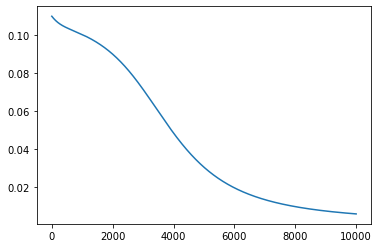

In [42]:
# visualizing the error after each epoch
plt.plot(np.arange(1,epochs+1), np.array(error_epoch))

In [43]:
# final output from the model
output

array([[0.95439168, 0.90619935, 0.15044935]])

In [44]:
# actual target
y

array([[1, 1, 0]])

In [45]:
# error at last epoch
error

array([[0.00104006, 0.00439928, 0.0113175 ]])